# Загрузка административных границ

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import geopandas as gpd
import osmnx as ox

In [2]:
# определим область интереса - г.Москва, Россия
AOI = 'Moscow, Russia'

In [3]:
# скачаем из open street map границы Москвы и сохраним в геодатафрейм
aoi_gdf = ox.geocode_to_gdf(AOI)

In [4]:
# атрибуты геодатафрейма
aoi_gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((36.80310 55.44083, 36.81136 55...",56.021224,55.142175,37.967428,36.803101,174337209,relation,102269,55.625578,37.606392,boundary,administrative,8,0.790819,state,Moscow,"Moscow, Central Federal District, Russia"


<Axes: >

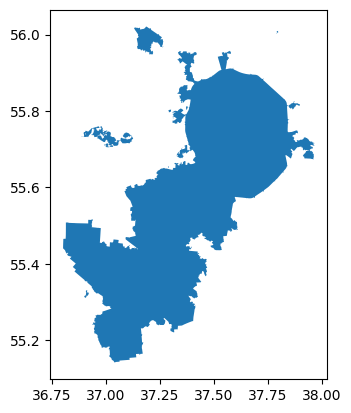

In [5]:
# визуализируем полигон с границами города
aoi_gdf.plot()

In [6]:
# визуализируем городские границы на интерактивной карте
basemap = aoi_gdf.explore(color='lightblue')
basemap

In [7]:
# теги для уточнения запроса в osmnx, чтобы скачать административные границы
tags = {'boundary':'administrative'}

In [8]:
# запрос в OSM для скачивания
admin_boundaries = ox.features_from_polygon(polygon = aoi_gdf.geometry.geometry.unary_union,
                                            tags = tags)

In [9]:
# обработка данных для того, чтобы оставить только границы городских округов Москвы
admin_boundaries = admin_boundaries.reset_index()
admin_boundaries = admin_boundaries.loc[admin_boundaries['element_type'] == 'relation']
admin_boundaries = admin_boundaries.loc[admin_boundaries['admin_level']=='5'].reset_index(drop=True)

In [10]:
# список городских округов
admin_boundaries['name']

0             Западный административный округ
1       Новомосковский административный округ
2             Троицкий административный округ
3             Северный административный округ
4      Северо-Западный административный округ
5       Зеленоградский административный округ
6     Северо-Восточный административный округ
7        Юго-Восточный административный округ
8                Южный административный округ
9         Юго-Западный административный округ
10           Восточный административный округ
11         Центральный административный округ
Name: name, dtype: object

In [11]:
print('Кол-во городских округов в Москве: ', admin_boundaries.shape[0])

Кол-во городских округов в Москве:  12


In [12]:
# городские округа на карте
admin_boundaries.explore(m=basemap, 
                         tooltip={"name"},
                         style_kwds=dict(color="black",weight=2, opacity=0.4, fillOpacity=0),)

In [13]:
# сохранить карту на диск
basemap.save("Moscow administrative boundaries.html")

In [14]:
type(admin_boundaries)

geopandas.geodataframe.GeoDataFrame

In [15]:
type(aoi_gdf)

geopandas.geodataframe.GeoDataFrame

In [16]:
# сохранить данные на диск
# границы города
aoi_gdf.to_file('aoi_gdf.gpkg', driver='GPKG')

In [17]:
# при сохранении геодатафрейма в geopackage могут возникнуть проблемы из-за формата хранения информации в некоторых атрибутах
# поэтому оставляем только нужные колонки и сохраняем надиск
admin_boundaries_cols = ['name', 'geometry']

In [18]:
# границы городских округов
admin_boundaries[admin_boundaries_cols].to_file('admin_boundaries.gpkg', driver='GPKG')

In [19]:
# прочитать данные с диска
aoi_gdf_read = gpd.read_file("aoi_gdf.gpkg") 
admin_boundaries_read = gpd.read_file("admin_boundaries.gpkg") 

In [20]:
# визуализировать загруженные с диска данные
map_read=aoi_gdf_read.explore(color='lightblue')
admin_boundaries_read.explore(m=map_read, 
                         tooltip={"name"},
                         style_kwds=dict(color="black",weight=2, opacity=0.4, fillOpacity=0),)